<a href="https://colab.research.google.com/github/zidniryi/ML_python/blob/main/Numpy%2C%20keras%2C%20tensor%2C%20pandas%20fundamental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
# Pytorch
import torch

# Image
import os
import PIL
import PIL.Image
import tensorflow_datasets as tfds
import pathlib
import matplotlib.pyplot as plt

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


Scalar Tensor

In [ ]:
rank_0_tensor = tf.constant(11)

In [ ]:
print(rank_0_tensor)

tf.Tensor(11, shape=(), dtype=int32)


Vector = Array

In [ ]:
rank_1_tensor = tf.constant([11,22,44,11])

In [ ]:
print(rank_1_tensor)

tf.Tensor([11 22 44 11], shape=(4,), dtype=int32)


Matrix

In [ ]:
# If you want to be specific, you can set the dtype (see below) at creation time
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
print(rank_2_tensor)


tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


In [ ]:
rank_2s_tensor = tf.constant([[2, 2],
                             [8, 4],
                             [5, 6]], dtype=tf.float16)


In [ ]:
rank_matrix_sum = rank_2_tensor + rank_2s_tensor
print(rank_matrix_sum)

tf.Tensor(
[[ 3.  4.]
 [11.  8.]
 [10. 12.]], shape=(3, 2), dtype=float16)


3 Tensor

In [ ]:
rank_3_tensor = tf.constant([[[11,111,1000], [22,222,2000]],
                            [[33,333,3000], [44,444,4000]],
                            [[55,555,5000], [66,666,6000]]
                             ])

In [ ]:
print(rank_3_tensor)

tf.Tensor(
[[[  11  111 1000]
  [  22  222 2000]]

 [[  33  333 3000]
  [  44  444 4000]]

 [[  55  555 5000]
  [  66  666 6000]]], shape=(3, 2, 3), dtype=int32)


Konversi ke Numpy

In [ ]:
np.array(rank_0_tensor)

array(11, dtype=int32)

In [ ]:
np.array(rank_1_tensor)

array([11, 22, 44, 11], dtype=int32)

In [ ]:
np.array(rank_2_tensor)

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

In [ ]:
np.array(rank_3_tensor)

array([[[  11,  111, 1000],
        [  22,  222, 2000]],

       [[  33,  333, 3000],
        [  44,  444, 4000]],

       [[  55,  555, 5000],
        [  66,  666, 6000]]], dtype=int32)

Tensor Flow Operation

In [ ]:
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 1],
                 [1, 1]]) # Could have also said `tf.ones([2,2])`

print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")


tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



You can use math operation

In [ ]:
print(a + b, "\n") # element-wise addition
print(a * b, "\n") # element-wise multiplication
print(a @ b, "\n") # matrix multiplication
print(a / b, "\n") # matrix multiplication


tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float64) 



Operation like max etc

In [ ]:
c = tf.constant([[4.0, 5.0], [10.0, 1.0]])

# Find the largest value
print(tf.reduce_max(c))
# Find the index of the largest value
print(tf.argmax(c))
# Compute the softmax
print(tf.nn.softmax(c))
# Numpy Convert soo nice
print(tf.cos(c).numpy())


tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor(
[[0.269 0.731]
 [1.    0.   ]], shape=(2, 2), dtype=float32)
[[-0.654  0.284]
 [-0.839  0.54 ]]


##Load Image


In [ ]:
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
print(np.version)

<module 'numpy.version' from '/usr/local/lib/python3.6/dist-packages/numpy/version.py'>


In [ ]:
data_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"


In [ ]:
data_dir = tf.keras.utils.get_file(origin=data_url, fname="flower_photos", untar=True)

228818944/228813984 [==============================] - 2s 0us/step


In [ ]:
data_dir = pathlib.Path(data_dir)

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


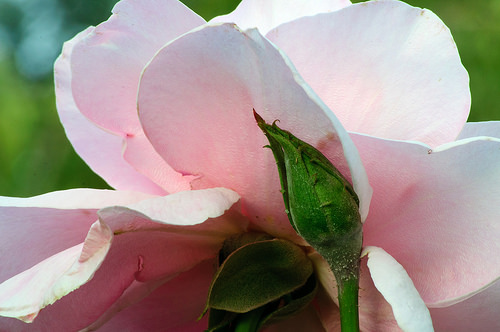

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

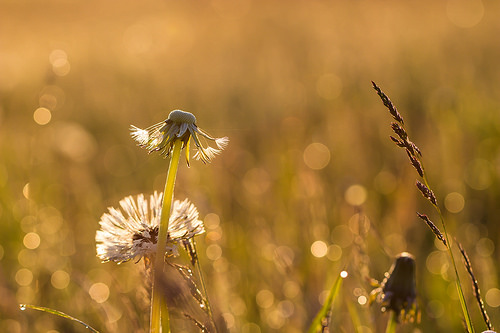

In [ ]:
dandelion = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dandelion[11]))

##load_using_keraspreprocessing
https://www.tensorflow.org/tutorials/load_data/images#

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


##Visualize the data

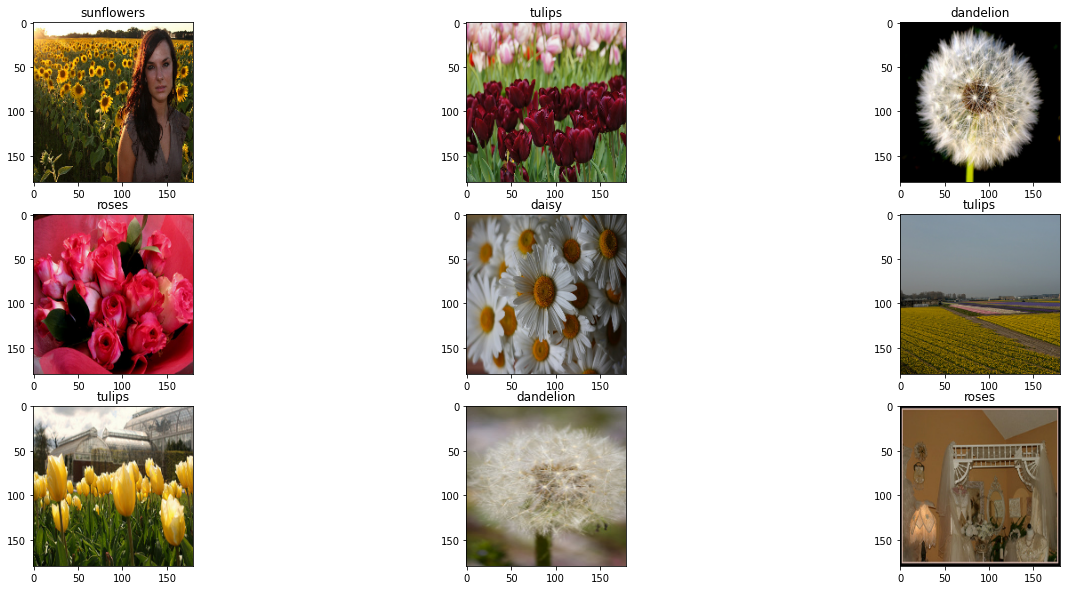

In [ ]:
plt.figure(figsize=(22, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("on")

Text(0.5, 1.0, 'dandelion')


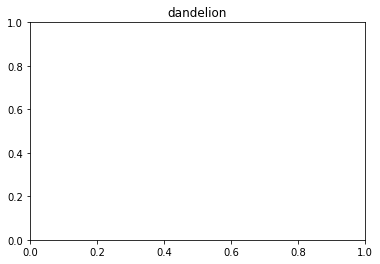

In [ ]:
print(plt.title(class_names[labels[2]]))

###Learn Official
Load CSV files

https://www.tensorflow.org/tutorials/load_data/csv

In [ ]:

abalone_train = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"] )

In [ ]:
abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [ ]:
abalone_train.shape

(3320, 8)

In [ ]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

In [ ]:
abalone_features

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.435,0.335,0.110,0.3340,0.1355,0.0775,0.0965
1,0.585,0.450,0.125,0.8740,0.3545,0.2075,0.2250
2,0.655,0.510,0.160,1.0920,0.3960,0.2825,0.3700
3,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600
4,0.545,0.420,0.130,0.8790,0.3740,0.1695,0.2300
...,...,...,...,...,...,...,...
3315,0.605,0.475,0.180,0.9365,0.3940,0.2190,0.2950
3316,0.700,0.525,0.190,1.6015,0.7070,0.3650,0.4300
3317,0.530,0.420,0.130,0.8365,0.3745,0.1670,0.2490
3318,0.395,0.315,0.105,0.3515,0.1185,0.0910,0.1195


In [ ]:
abalone_labels

0        7
1        6
2       14
3       16
4       13
        ..
3315    15
3316    10
3317    11
3318    16
3319    19
Name: Age, Length: 3320, dtype: int64

In [ ]:
abalone_features = np.array(abalone_features)

In [ ]:
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [ ]:
abalone_features[1,:]

array([0.585, 0.45 , 0.125, 0.874, 0.354, 0.207, 0.225])

In [ ]:
abalone_features[1000, :]

array([0.335, 0.245, 0.09 , 0.167, 0.059, 0.04 , 0.06 ])

In [ ]:
# Make prediction model with keras
abalone_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])


In [ ]:
abalone_model.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam())

In [ ]:
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 1ms/step - loss: 87.1555
Epoch 2/10
104/104 [==============================] - 0s 1ms/step - loss: 16.8156
Epoch 3/10
104/104 [==============================] - 0s 1ms/step - loss: 8.7783
Epoch 4/10
104/104 [==============================] - 0s 1ms/step - loss: 8.4503
Epoch 5/10
104/104 [==============================] - 0s 1ms/step - loss: 8.2331
Epoch 6/10
104/104 [==============================] - 0s 1ms/step - loss: 7.0669
Epoch 7/10
104/104 [==============================] - 0s 1ms/step - loss: 6.8260
Epoch 8/10
104/104 [==============================] - 0s 1ms/step - loss: 6.8502
Epoch 9/10
104/104 [==============================] - 0s 1ms/step - loss: 6.7469
Epoch 10/10
104/104 [==============================] - 0s 2ms/step - loss: 6.4150


Orthodox

In [ ]:
i = np.array([1,0])

In [ ]:
i

array([1, 0])

In [ ]:
j = np.array([0,1])
j

array([0, 1])

In [ ]:
np.dot(i,j)

0

Matrices Rank 2 Of Tensor

In [ ]:
X = np.array([[25, 2], [5, 26], [3, 7]])

In [ ]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [ ]:
X.shape

(3, 2)

In [ ]:
X.size

6

In [ ]:
X.max()

26

In [ ]:
X.min()

2

In [ ]:
# Select left column of matrix X (zero-indexed)
X[:,0]

array([25,  5,  3])

In [ ]:
# Select middle row of matrix X: 
X[1,:]

array([ 5, 26])

In [ ]:
X[0,1]

25

In [ ]:
# Select Last Row
X[2,:]


array([3, 7])

In [ ]:
# slice by index
# Another slicing-by-index example: 
X[0:2, 0:2]

array([[ 2, 25],
       [ 5, 26]])

###Matrice In PytOrch


In [ ]:
X_pt = torch.tensor([[25, 2], [5, 26], [3, 7]])

In [ ]:
X_pt

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [ ]:
X_pt.shape

torch.Size([3, 2])

In [ ]:
X_pt[1,:]

tensor([ 5, 26])

###Matrice In TensorFlow

In [ ]:
X_tf = tf.Variable([[25, 2], [5, 26], [3, 7]])

In [ ]:
X_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[25,  2],
       [ 5, 26],
       [ 3,  7]], dtype=int32)>

In [ ]:
X_tf.shape

TensorShape([3, 2])

In [ ]:
X_tf[2, :]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([3, 7], dtype=int32)>

In [ ]:
X_tf[:,1]

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 2, 26,  7], dtype=int32)>

##Higher Rank Tensor
As an example, rank 4 tensors are common for images, where each dimension corresponds to:

Number of images in training batch, e.g., 32
Image height in pixels, e.g., 28 for MNIST digits
Image width in pixels, e.g., 28
Number of color channels, e.g., 3 for full-color images (RGB)

In [ ]:
images_pt = torch.zeros([32, 28, 28, 3])

In [ ]:
# images_pt

In [ ]:
images_tf = tf.zeros([32, 28, 28, 3])

In [ ]:
images_tf

<tf.Tensor: shape=(32, 28, 28, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


   

In [ ]:
images_tf.shape

TensorShape([32, 28, 28, 3])

In [ ]:
# np.array(images_tf)

##Segmen Common Tensor Operations

In [ ]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [ ]:
X.T

array([[25,  5,  3],
       [ 2, 26,  7]])

In [ ]:
tf.transpose(X_tf)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[25,  5,  3],
       [ 2, 26,  7]], dtype=int32)>

In [ ]:
X_pt.T

tensor([[25,  5,  3],
        [ 2, 26,  7]])

#### Tensor arithmetic

In [ ]:
X * 2

array([[ 4, 50],
       [10, 52],
       [ 6, 14]])

In [ ]:
X + 2

array([[ 4, 27],
       [ 7, 28],
       [ 5,  9]])

In [ ]:
X * 2 + 2

array([[ 6, 52],
       [12, 54],
       [ 8, 16]])

In [ ]:
# Torch Mull For Fixed Overloaded Python
# Python operators are overloaded; could alternatively use torch.mul() or torch.add()

# Before
X_pt*2+2

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [ ]:
# Using Torch For Fixing OverLoaded
torch.add(torch.mul(X_pt, 2), 2)

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [ ]:
X_tf*2+2 

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]], dtype=int32)>

In [ ]:
tf.add(tf.multiply(X_tf, 2), 2)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[52,  6],
       [12, 54],
       [ 8, 16]], dtype=int32)>

If two tensors have the same size, operations are often by default applied element-wise. This is not matrix multiplication, which we'll cover later, but is rather called the Hadamard product or simply the element-wise product.

In [ ]:
A = X + 2
A

array([[27,  4],
       [ 7, 28],
       [ 5,  9]])

In [ ]:
BA = X + A
BA

array([[ 6, 52],
       [12, 54],
       [ 8, 16]])

In [ ]:
X * A

array([[  8, 675],
       [ 35, 728],
       [ 15,  63]])

In [ ]:
X / A

array([[0.5  , 0.926],
       [0.714, 0.929],
       [0.6  , 0.778]])

In [ ]:
X ^ A

array([[ 6,  2],
       [ 2,  6],
       [ 6, 14]])

In [ ]:
X % A

array([[ 2, 25],
       [ 5, 26],
       [ 3,  7]])

## Reduction 

Calculating the sum across all elements of a tensor is a common operation. For example:

For vector x of length n, we calculate  ∑𝑛𝑖=1𝑥𝑖 
For matrix X with m by n dimensions, we calculate  ∑𝑚𝑖=1∑𝑛𝑗=1𝑋𝑖,𝑗

In [ ]:
X

array([[ 2, 25],
       [ 5, 26],
       [ 3,  7]])

In [ ]:
X.sum()

68

In [ ]:
torch.sum(X_pt)

tensor(68)

In [ ]:
tf.reduce_sum(X_tf)

<tf.Tensor: shape=(), dtype=int32, numpy=68>

In [ ]:

np.array(tf.reduce_sum(X_tf))

array(68, dtype=int32)

In [ ]:
# Reduction in tensorflow
X.sum(axis=1)

array([27, 31, 10])

In [ ]:
# With tocrh
torch.sum(X_pt, 0)

tensor([33, 35])

In [ ]:
# with tensor
tf.reduce_sum(X_tf, 1)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([27, 31, 10], dtype=int32)>

In [ ]:
torch.max(X_pt, 1)

torch.return_types.max(values=tensor([25, 26,  7]), indices=tensor([0, 1, 1]))

##Dot Product
If we have two vectors (say, x and y) with the same length n, we can calculate the dot product between them. This is annotated several different ways, including the following:

𝑥⋅𝑦 
𝑥𝑇𝑦 
⟨𝑥,𝑦⟩ 
Regardless which notation you use (I prefer the first), the calculation is the same; we calculate products in an element-wise fashion and then sum reductively across the products to a scalar value. That is,  𝑥⋅𝑦=∑𝑛𝑖=1𝑥𝑖𝑦𝑖 

The dot product is ubiquitous in deep learning: It is performed at every artificial neuron in a deep neural network, which may be made up of millions (or orders of magnitude more) of these neurons.

In [ ]:
x = np.array([25, 2, 5])

In [ ]:
x

array([25,  2,  5])

In [ ]:
y = np.array([0,1,2])

In [ ]:
y

array([0, 1, 2])

In [ ]:
# Dot without numpy
25*0 + 2*1 + 5*2

12

In [ ]:
np.dot(x, y)

12

In [ ]:
# With Torch
x_pt = torch.tensor([25, 2, 5])

In [ ]:
x_pt

tensor([25,  2,  5])

In [ ]:
y_pt = torch.tensor([0,1,2])

In [ ]:
y_pt

tensor([0, 1, 2])

In [ ]:
np.dot(x_pt, y_pt)

12

In [ ]:
# With tensorflow
x_tf = tf.Variable([25, 2, 5])

In [ ]:
x_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([25,  2,  5], dtype=int32)>

In [ ]:
y_tf = tf.Variable([0,1,2])

In [ ]:
y_tf

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([0, 1, 2], dtype=int32)>

In [ ]:
tf.reduce_sum(tf.multiply(x_tf, y_tf))

<tf.Tensor: shape=(), dtype=int32, numpy=12>

### Frobenius Norm

In [ ]:
X = np.array([[1, 2], [3, 4]])

In [ ]:
X

array([[1, 2],
       [3, 4]])

In [ ]:
# Before used  norm
(1**2 + 2**2 + 3**2 + 4**2)**(1/2)

5.477225575051661

In [ ]:
np.linalg.norm(X)

5.477225575051661

In [ ]:
# With Torch
X_pt = torch.tensor([[1, 2], [3, 4.]])

In [ ]:
X_pt

tensor([[1., 2.],
        [3., 4.]])

In [ ]:
torch.norm(X_pt)

tensor(5.4772)

In [ ]:
X_tf = tf.Variable([[1, 2], [3, 4.]])

In [ ]:
X_tf

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

In [ ]:
tf.norm(X_tf)

<tf.Tensor: shape=(), dtype=float32, numpy=5.477226>

### Matrix Multiplication (with a Vector)

In [ ]:
A = np.array([[3, 4], [5, 6], [7, 8]])

In [ ]:
A

array([[3, 4],
       [5, 6],
       [7, 8]])

In [ ]:
b = np.array([1, 2])
b

array([1, 2])

In [ ]:
np.dot(A,b)

array([11, 17, 23])

In [ ]:
# With torch
A_pt = torch.tensor([[3, 4], [5, 6], [7, 8]])

In [ ]:
A_pt

tensor([[3, 4],
        [5, 6],
        [7, 8]])

In [ ]:
b_pt = torch.tensor([1, 2])

In [ ]:
b_pt

tensor([1, 2])

In [ ]:
torch.matmul(A_pt, b_pt)

tensor([11, 17, 23])

In [ ]:
A_tf = tf.Variable([[3, 4], [5, 6], [7, 8]])

In [ ]:
A_tf

<tf.Variable 'Variable:0' shape=(3, 2) dtype=int32, numpy=
array([[3, 4],
       [5, 6],
       [7, 8]], dtype=int32)>

In [ ]:
b_tf = tf.Variable([1, 2])

In [ ]:
b_tf

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([1, 2], dtype=int32)>

In [ ]:
tf.linalg.matvec(A_tf, b_tf)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([11, 17, 23], dtype=int32)>

##Symmetric Matrices

In [ ]:
X_sym = np.array([[0, 1, 2], [1, 7, 8], [2, 8, 9]])

In [ ]:
X_sym

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [ ]:
X_sym.T

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [ ]:
X_sym.T == X_sym

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [ ]:
# Excersise
x_test = np.array([11, 22,33])
y_test = np.array([11,10,22])

x_test == y_test
x_test + y_test

array([22, 32, 55])

###Identity Matrices

In [ ]:
I = torch.tensor([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
I

tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]])

In [ ]:
x_pt = torch.tensor([25, 2, 5])
x_pt

tensor([25,  2,  5])

In [ ]:
torch.matmul(I, x_pt)

tensor([25,  2,  5])

###Matrix Inversion

In [ ]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [ ]:
# Inversion
Xinv = np.linalg.inv(X)

In [ ]:
Xinv

array([[ 1.5,  1. ],
       [-2.5, -2. ]])

In [ ]:
# Excrercise
X_exc = np.array([[1,3,3], [1,4,3], [1,3,4]])

In [ ]:
X_exc

array([[1, 3, 3],
       [1, 4, 3],
       [1, 3, 4]])

In [ ]:
X_exc_inv = np.linalg.inv(X_exc)

In [ ]:
X_exc_inv

array([[ 7., -3., -3.],
       [-1.,  1.,  0.],
       [-1.,  0.,  1.]])

## Geometric Visualization

In [ ]:
b = np.linspace(-10, 10, 1000) 

In [ ]:
c1 = 2 - 2*b

In [ ]:
c2 = (7-5*b)/3